### 주의 : 랩서버에서 돌리기 : 잘 작동안하는 이유 (같은 VAE_3DCNN환경 인데도)
* torch는 default로 gpu 하나만 봄
* 어떤 GPU를 torch가 보는지는 그 enviornment 거기에 있다 (.bashrc인가 거기)
* 만약 다른 사람이 쓰고있다면, torch가 gpu가 share 되고 있어서 RAM이 없어요 하록 할 수 있는 것
* 따라서, **slurm srun으로 gpu할당받아서 interactive하게 돌려야함!!**

**command : `dsfdsfdsfds`** 

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys
import os
import torch
sys.path

/home/connectome/dyhan316/.conda/envs/VAE_3DCNN/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE',
 '/home/connectome/dyhan316/.conda/envs/VAE_3DCNN/lib/python37.zip',
 '/home/connectome/dyhan316/.conda/envs/VAE_3DCNN/lib/python3.7',
 '/home/connectome/dyhan316/.conda/envs/VAE_3DCNN/lib/python3.7/lib-dynload',
 '',
 '/home/connectome/dyhan316/.conda/envs/VAE_3DCNN/lib/python3.7/site-packages',
 '/home/connectome/dyhan316/.conda/envs/VAE_3DCNN/lib/python3.7/site-packages/IPython/extensions',
 '/home/connectome/dyhan316/.ipython']

In [3]:
import torch

In [4]:
##CHANGED to 3D_VAE version

In [5]:
##Learning yaml
import yaml
import numpy as np

#run.py 것을 배껴오는 것(argparse대신 직접 jupyter에서 돌리자)
with open("configs/3d_vae.yaml", 'r') as file:
    try :
        config = yaml.safe_load(file) #loading the config of vae.yaml
        print(config) #the configuration
    except : 
        print("load_failed")
print(type(config))
print(config['model_params']) #즉, dictionary inside a dictioanry이다

{'model_params': {'name': '3d_VanillaVAE', 'in_channels': 1, 'latent_dim': 128}, 'data_params': {'data_path': '/scratch/connectome/mieuxmin/UKB_sample', 'train_batch_size': 2, 'val_batch_size': 2, 'patch_size': 64, 'num_workers': 4, 'img_shape': [96, 96, 96]}, 'exp_params': {'LR': 0.005, 'weight_decay': 0.0, 'scheduler_gamma': 0.95, 'kld_weight': 0.00025, 'manual_seed': 1265}, 'trainer_params': {'gpus': [1], 'max_epochs': 5}, 'logging_params': {'save_dir': 'logs/', 'name': '3d_vae'}}
<class 'dict'>
{'name': '3d_VanillaVAE', 'in_channels': 1, 'latent_dim': 128}


# 1. Importing Dataset
* 이미 dataset folder안에서 하도록 github제공된 파일에서 해놓음.. 일단 이파트느 그냥 import하는 것만 해보고, 구체적인 것은 하지 말자

In [6]:
"""TODO : 
0. config파일을 고치기! (data path등등)
1. MONAI 만든 dataloader package를 불러와서 MRI 불러오기 ==> 거의 만듬! 밑에서 말한 것처럼 package화만 하면 된다!
2. [low-priority] config를 RAM이 다 차지 않는 선 내에서 조정하기 (아니다 굳이 할 필요가...? 이런거는 나중에 실제 SOTA나 "나의" 모델을 적용할때나 하자)
3. [high-priority] VAEDataset.py를 바꾸거나, 다 python module화 시키는 것을 해서 3DCNN에서는 그것을 쓰도록 하기 (전자가 나을듯 ㅋㅋㅋ 새로운
    class을 만들기 (VAEDataset을 다른 class로 정의해서 그것으 3DCNN에서는 불러와서 쓰도록 하기 )
"""

##밑에 "####  밑에 : jupyter로 dataloader 만든것! 이것을 (위에서 말하듯이) .py로 바꿔서 불러오도록 하기 "적은 곳의 것들ㅇ르
#pakcag화시켜서 밑의 것처럼 불러오기!



##밑의 것을 참조해서 package화 시킥 

#from dataset import VAEDataset #custommade dataloader
#
#data = VAEDataset(**config["data_params"], pin_memory=len(config['trainer_params']['gpus'])!=0)
#
#print(config["data_params"], '\n\n',config['trainer_params']) 
##이것을 kwargs로 넣어주는 것! (크게 신경쓰지 말기)
##print(**config["data_params"]) #이거는 안된다
#
#data.setup()

'TODO : \n0. config파일을 고치기! (data path등등)\n1. MONAI 만든 dataloader package를 불러와서 MRI 불러오기 ==> 거의 만듬! 밑에서 말한 것처럼 package화만 하면 된다!\n2. [low-priority] config를 RAM이 다 차지 않는 선 내에서 조정하기 (아니다 굳이 할 필요가...? 이런거는 나중에 실제 SOTA나 "나의" 모델을 적용할때나 하자)\n3. [high-priority] VAEDataset.py를 바꾸거나, 다 python module화 시키는 것을 해서 3DCNN에서는 그것을 쓰도록 하기 (전자가 나을듯 ㅋㅋㅋ 새로운\n    class을 만들기 (VAEDataset을 다른 class로 정의해서 그것으 3DCNN에서는 불러와서 쓰도록 하기 )\n'

#### pathlib, path로 장난치기 (나중에 ML_tutor 기초지식에 넣기)

In [7]:
#pathlib, path로 장난치기 
from pathlib import Path
ppath = Path('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE')
[i for i in ppath.iterdir()]

[PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/README.md'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/logs'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/LEARN_VANILLA_VAE.ipynb'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/__pycache__'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/utils.py'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/.idea'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/run.py'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/3D_VAE.ipynb'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/models'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/dataset.py'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/LICENSE.md'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/tests'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/experiment.py'),
 PosixPath('/scratch

In [8]:
[f for f in Path('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE').iterdir() if f.suffix == '.py']

[PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/utils.py'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/run.py'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/dataset.py'),
 PosixPath('/scratch/connectome/dyhan316/VAE_ADHD/PyTorch-VAE/experiment.py')]

In [9]:
! ls $cropped_dir | wc -l
! ls $cropped_dir | head -3
! ls $base_dir | head -3

15
3D_VAE.ipynb
assets
configs
3D_VAE.ipynb
assets
configs


In [10]:

#base_dir = '/storage/bigdata/UKB/brain_prep/1.sMRI/1.sMRI_fs'
#cropped_dir = '/storage/bigdata/UKB/brain_prep/1.sMRI/2.sMRI_fs_cropped'
##! ls $cropped_dir | head -2 
##print(os.listdir(cropped_dir))
#[f for f in Path(cropped_dir).iterdir() if f.suffix == '.gz'] # f.suffixes로 하면 nii.gz까지 다 있으나
                                                             #.crop때문에 복잡해짐..

####  밑에 : jupyter로 dataloader 만든것! 이것을 (위에서 말하듯이) .py로 바꿔서 불러오도록 하기 

In [11]:
##나중에 .py로 옮기기 위해서 여기서 일단 만들기

import os
import torch
from torch import Tensor
from pathlib import Path
from typing import List, Optional, Sequence, Union, Any, Callable
from torchvision.datasets.folder import default_loader
from pytorch_lightning import LightningDataModule
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.datasets import CelebA
import zipfile

In [12]:
#위에서서 split="train" : train, "test" : validation이다. 즉, testing용은 아예 따른 폴더에데가 저장을 해놨어야 하는 것 같음
from monai.data import ImageDataset
from monai.transforms import *


In [13]:
##define dataset (through kinda wrapping over the ImageDataset)
def UKB_T1(data_path, split, transform, **kwargs):
    """주의 : train/test split rate : 0.75로 preset (희환쌤 코드 처럼 분리할 수도 있을 것 같으나, 이것은 나중에 하자 )"""
    
    #list imgs list inside the directory, with suffixes ending in .gz (list of nii.gz files) ==> sorted 
    imgs = sorted([f for f in Path(data_path).iterdir() if f.suffix == '.gz']) # f.suffixes로 하면 nii.gz까지 다 있으나, .crop도 suffix로 인정되어 복잡해짐..
    
    #TRAIN_TEST SPLIT (take first 75% or last 25% of iamge list depending on split)
    imgs = imgs[:int(len(imgs)*0.75)] if split == "train" else imgs[int(len(imgs)*0.75): ] #i.e. 앞의 75% if train/뒤의 25% if test
                        #list of subject directories (PosixPath) to use
    
    
    """labels도 위의 두 줄처럼럼 어떻게 해서 하기
        #imgs와 order 이 같아야하는 것을 주의하면서! 근데 원래 CELEBA도 40짜리 label을 가져서, 우리도 label찾아서 해야할 듯!
        ordering이 맞아야한다는 것을 주의하기!
        일단은 그냥 똑같은 shape를 가진 0으로된np  array로 하자"""
    lbls = np.zeros(len(imgs))

    return ImageDataset(image_files=imgs, labels = lbls, transform = transform)
    

In [14]:
new_transform = Compose([ ScaleIntensity(), AddChannel(), 
                 ResizeWithPadOrCrop(spatial_size = (170,100,150), method = "symmetric", mode = "constant"),
                 ToTensor()]) 

* scale intenstiy first or reeswizse first? (voxel size invariant property?)
* image shape different => zero padding + rewize

In [15]:
##define dataloader class 
from monai.transforms import *

##CHANGE IT!
class VAEDataset(LightningDataModule):
    """
    PyTorch Lightning data module 

    Args:
        data_dir: root directory of your dataset.
        train_batch_size: the batch size to use during training.
        val_batch_size: the batch size to use during validation.
        patch_size: the size of the crop to take from the original images.
        num_workers: the number of parallel workers to create to load data
            items (see PyTorch's Dataloader documentation for more details).
        pin_memory: whether prepared items should be loaded into pinned memory
            or not. This can improve performance on GPUs.
    """

    def __init__(
        self,
        data_path: str,
        train_batch_size: int = 8,
        val_batch_size: int = 8,
        patch_size: Union[int, Sequence[int]] = (256, 256),
        num_workers: int = 0,
        pin_memory: bool = False,
        img_shape: list =[90,90,90],
        **kwargs,
    ):
        super().__init__()

        self.data_dir = data_path
        self.train_batch_size = train_batch_size
        self.val_batch_size = val_batch_size
        self.patch_size = patch_size
        self.num_workers = num_workers
        self.pin_memory = pin_memory
        self.img_shape = img_shape

    def setup(self, stage: Optional[str] = None) -> None:
        

        ##########이 파트를 바꾸기!
#       =========================  UKB_T1 Dataset #CelebA Dataset  =========================
        
    
        """IMPLEMENT WITH 정윤쌤 코드"""
        train_transforms = Compose([ScaleIntensity(), AddChannel(), 
                 ResizeWithPadOrCrop(spatial_size = self.img_shape, method = "symmetric", mode = "constant"),
                 ToTensor()]) 
        
        val_transforms = Compose([ScaleIntensity(), AddChannel(), 
                 ResizeWithPadOrCrop(spatial_size = self.img_shape, method = "symmetric", mode = "constant"),
                 ToTensor()]) 

        
        #UKB_T1 function (not class)를 썼다!
        self.train_dataset = UKB_T1(
            data_path = self.data_dir,
            split = 'train',
            transform = train_transforms,
        )
        
        self.val_dataset = UKB_T1(
            data_path = self.data_dir,
            split = 'test',
            transform = val_transforms,
        )
        #self.train_dataset = MyCelebA(
        #    self.data_dir,
        #    split='train',
        #    transform=train_transforms,
        #    download=False,
        #)
        
        ## Replace CelebA with your dataset
        #self.val_dataset = MyCelebA(
        #    self.data_dir,
        #    split='test',
        #    transform=val_transforms,
        #    download=False,
        #)
#       ===============================================================
    
    
    """밑에 파트는 바꿀필요 없다 ㅋㅋㅋㅋ """
    def train_dataloader(self) -> DataLoader:
        return DataLoader(
            self.train_dataset,
            batch_size=self.train_batch_size,
            num_workers=self.num_workers,
            shuffle=True,
            pin_memory=self.pin_memory,
        )

    def val_dataloader(self) -> Union[DataLoader, List[DataLoader]]:
        return DataLoader(
            self.val_dataset,
            batch_size=self.val_batch_size,
            num_workers=self.num_workers,
            shuffle=False,
            pin_memory=self.pin_memory,
        )
    
    def test_dataloader(self) -> Union[DataLoader, List[DataLoader]]:
        return DataLoader(
            self.val_dataset,
            batch_size=144,
            num_workers=self.num_workers,
            shuffle=True,
            pin_memory=self.pin_memory,
        )
     

In [16]:
##from dataset import VAEDataset #custommade dataloader
##
data = VAEDataset(**config['data_params'], pin_memory=len(config['trainer_params']['gpus'])!=0)
print(config["data_params"], '\n\n',config['trainer_params']) 
#이것을 kwargs로 넣어주는 것! (크게 신경쓰지 말기)
#print(**config["data_params"]) #이거는 안된다
#
data.setup()

{'data_path': '/scratch/connectome/mieuxmin/UKB_sample', 'train_batch_size': 2, 'val_batch_size': 2, 'patch_size': 64, 'num_workers': 4, 'img_shape': [96, 96, 96]} 

 {'gpus': [1], 'max_epochs': 5}


In [17]:
##for testing
val_dat = data.val_dataloader()
print(next(iter(val_dat)))
print(next(iter(val_dat))[0].shape)

[tensor([[[[[0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           ...,
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205]],

          [[0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           ...,
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205]],

          [[0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.0205, 0.0205,  ..., 0.0205, 0.0205, 0.0205],
           [0.0205, 0.020

### 1.1.(?) dataset가지고 놀기

In [18]:
"""TODO : 
1. plt.imshow로 예시 보인 것을 nilearn이나 그런것으로 볼 수 있는 방법을 찾아서 해보기 (not that important, but 해보자!(nilearn))

"""

##data.train_dataset
#print("data.train_dataset :", data.train_dataset)
#sample_data = data.train_dataset[1200] #let's look at the first element
#
#print("\nsample_data (0th data) (tuple)의 shapes (RGB 세개) : ", [i.shape for i in sample_data[0]])
#
##let's plot the first iamge
#import cv2
#import matplotlib.pyplot as plt
#
#image_permute = sample_data[0].permute((1,2,0)) #matplotlib은 [H,W,C]로 받아서 axis permute해주기
#plt.imshow(image_permute)

'TODO : \n1. plt.imshow로 예시 보인 것을 nilearn이나 그런것으로 볼 수 있는 방법을 찾아서 해보기 (not that important, but 해보자!(nilearn))\n\n'

### 1.2.(?) Dataloader가지고 놀기

> `data.train_dataloader()`로 dataloader 바로 소환가능! (모듈이 그렇게 하다록 짜져있다)


결론(밑의 shape보기) : 
* input (image) batch : batch size 64, 64*64 RGB
* target batch : vector with 40 features

<br>

the shapes and stuff above is expected, since that is what we gave as input when loading the dataset, (`config["data_params"]`)

<br>

따라서, T1 image 넣고싶으면 이 `config`의 모든 것들 바꾸면 될듯!(not just its `data_params` key but all others)

In [19]:
##이 example파트도 그 MRI version으로 바꿀 수 있으면 해보기

#train_loader = data.train_dataloader()
#
#sample_batch = next(iter(train_loader)) #iterator object이니, 이렇게 one batch 빼내기 가능
#
#print("sample_batch 의 type : ", type(sample_batch))
#print("sample_batch의 type/contents : ", [i.shape for i in sample_batch])


## 3. Actually Running the Vanilla VAE code (with some modification so that all can be run in this one notebook)

### X.0. Setting the configuration, and importing stuff

In [20]:
import torch
from models import BaseVAE
from torch import nn
from torch.nn import functional as F
from models import *

#config importing은 위에서 했기에 생략

### X.1. Importing the Dataset => 위에서 다 실험해본다음에 여기로 옮기기! (일단은 SKIP)

* `nn.Conv2d` 에서 inchannels 지정안해줘도 예가 알아서 할 수 있음

* Encoder, Decoder이 channels가 있다! (CNN + VAE쪽 공부해야할듯.. 나는 1D VAE만 공부함)


* 아!!! `nn.Linear`, `nn.Sequential`로 된것들은 model로 instantiate해서 print하면, 함수의 그것으로 나오구나!

study :

1. Ali Ghodsi Lecture: (1D array가정하기는 했지만, VAE개념 초반에 잡기 좋음) : https://www.youtube.com/watch?v=uaaqyVS9-rM&t=3151s

2. Stanford Lecture : (이 코드와 직접 연관있는 CNN + VAE) (특히, Convtranspose파트) https://www.youtube.com/watch?v=5WoItGTWV54&t=2442s

## 전체 code structure

1. `__init__` : 다양한 것들을 정의해놓음
2. `encode` : RGB image받아서 `[mu, logvar]`인 것들로 만듬 (later for reparametrization)(참고로 mu, logvar 둘다 batch dimension을 가지고 있음)
3. `reparametericzation` :encode에서 받은 `mu, logvar`가지고 normal PDF 만들어서 실제로 decoder input들을 만들기 
4. `decoder` : `reparameterization`에서 받은 input가지고 linear한번 거친 후 deflatten시켜서 (즉, image format으로 만들어서) 이미지를 reconstruct하기



## **주의주의주의** : model structure (hidden layer, image size 등등)을 바꿀때 어떻게 바꿔줘야하는지 밑에 보기

밑에서 모델의 structure을 바꾸는 방법은 두가지임 : 
1. `config['model_params']`에 있는 것들을 바꾸거나
2. `class VanillnaVAE`속에 있는 `hidden_dims` 를 바꾸거나 

<br>
CNN -> MLP 파트고치는 문제 때문에, `**config**`에 있는 parameters들은 바꿔도 자동으로 작동을 여전히 하지만 (except for channel 갯수), **`hidden_dims`** 에 있는 것들은 바꾸면 model자체를 조금 뜯어 고쳐야함...

==> 어떤 것들을 고쳐야 하는지 밑에 함..

#### `hidden_dims`나 image size를 바꾸면 바꿔야할 것들 
1. CNN last layer의 output image의 shape변화에 따라서 바꿔주기
    * 찾아 내는 법 : 그냥 돌려보고 애러뜨면 그 애러 떤 shape에다가 np.cbrt()해서 어느 값으로 해야할지 정하기 (밑의 경우 : 6)
2. hidden_dims의 마지막 layer channel갯수를, deocder_input => decoder 넣기 위해 reshape할때 넣어줘야함!



#### 밑 : 두 바꿔야할것들을 적어 놓은 것!

1. problem1 바꿔야할 것들

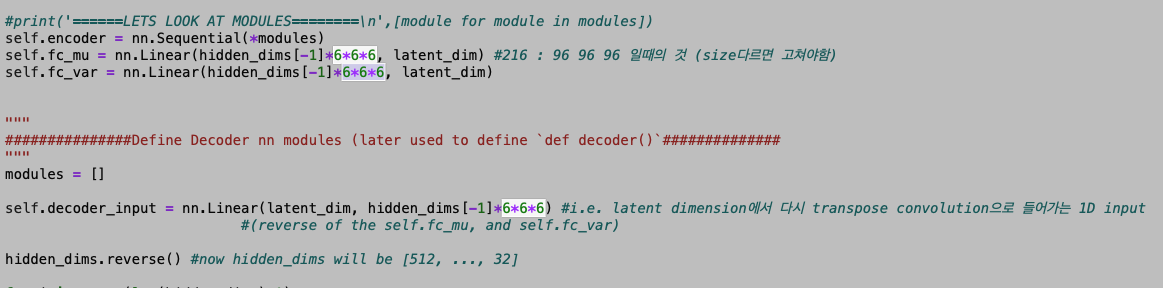

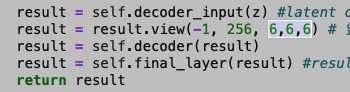

2. problem2 바꿔야할 것들

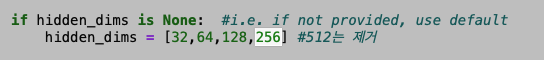

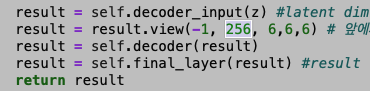


In [21]:
#from .types_ import *                                         #이것대신 밑에서 직접 .py안에 있던 것을 가져왔다
from typing import List, Callable, Union, Any, TypeVar, Tuple
Tensor = TypeVar('torch.tensor') #Te

class VanillaVAE(BaseVAE): #BaseVAE doesn't have anythign meaningful I THINK
    def __init__(self,
                in_channels : int,
                latent_dim : int,
                hidden_dims : List = None,
                **kwargs) -> None:
        super(VanillaVAE, self).__init__()
        
        self.latent_dim = latent_dim #must be provided when initializing the VAE

        if hidden_dims is None:  #i.e. if not provided, use default
            hidden_dims = [32,64,128,256] #512는 제거 
            
        """
        ###############Define Encoder nn modules (later used to define `def encoder()`)##############
        """

        modules = [] #will append to here the nn.Sequentials below 
        for h_dim in hidden_dims: #i.e. 32, 64, ...로 hidden dim (= channel 갯수)을 점점 키우면서 (ecoder)
            modules.append(
                nn.Sequential(
                    nn.Conv3d(in_channels, out_channels = h_dim, 
                             kernel_size=3, stride=2, padding=1),
                    nn.BatchNorm3d(h_dim),
                    nn.LeakyReLU())                  
            )
            in_channels = h_dim #i.e. the in_channel for the decoder is the last h_dim of the encoder (keeps updating)
        
        #print('======LETS LOOK AT MODULES========\n',[module for module in modules])
        self.encoder = nn.Sequential(*modules) 
        self.fc_mu = nn.Linear(hidden_dims[-1]*6*6*6, latent_dim) #216 : 96 96 96 일때의 것 (size다르면 고쳐야함)
        self.fc_var = nn.Linear(hidden_dims[-1]*6*6*6, latent_dim)        

        
        """
        ###############Define Decoder nn modules (later used to define `def decoder()`##############
        """
        modules = []
        
        self.decoder_input = nn.Linear(latent_dim, hidden_dims[-1]*6*6*6) #i.e. latent dimension에서 다시 transpose convolution으로 들어가는 1D input
                                    #(reverse of the self.fc_mu, and self.fc_var)
        
        hidden_dims.reverse() #now hidden_dims will be [512, ..., 32]
        
        for i in range(len(hidden_dims)-1):
            modules.append(
                nn.Sequential(
                    nn.ConvTranspose3d(in_channels = hidden_dims[i],
                                       out_channels= hidden_dims[i+1],
                                       kernel_size=3, stride=2, padding=1, output_padding=1),
                    nn.BatchNorm3d(hidden_dims[i+1]), 
                    nn.LeakyReLU()
                )            
            )
        self.decoder = nn.Sequential(*modules)
        
        #이 final layer은 뭐하는 애인지 잘 모르겠다만... ㅋㅋㅋ 일단 넘어가보자
        self.final_layer = nn.Sequential(
            nn.ConvTranspose3d(in_channels=hidden_dims[-1],
                              out_channels=hidden_dims[-1], ###?????이건 뭐지... model structure을 잘 봐야할듯...?? (똑같은 channel갯수 두번?)
                              kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm3d(hidden_dims[-1]),
            nn.LeakyReLU(),
            nn.Conv3d(in_channels = hidden_dims[-1], out_channels=1, #이 layer이 마지막으로 이미지를 만들어내는 layer인듯 (out_channel = 3 means RGB)
                    kernel_size=3, padding = 1),
            nn.Tanh() #output을 0~1 사이의 값으로 한정...? 나중에 부풀려주나?
        )                

            
        """
        ###############Build Encoder/Decoder (앞서 쓴 encoder/decoder 들을 실제로 encoder(), decode () method로 정의하자#############
        """     

    def encode(self, input : Tensor) -> List[Tensor]:
        """
        input : Tensor of [N x C x H x W]       #N : batch size, C : channel size, H,W : image sizes
        return : (Tensor) list of latent codes (i.e. mu, log_var)
        """
        result = self.encoder(input) #encoder에 input을 넣어기
        result = torch.flatten(result, start_dim = 1) #encoder 결과를 flatten하기 거기다가 `nn.Linear` 해서(mu, var 구하기 위해서)
                                                        #.view[-1...]로 했어도 됬을 듯
        #flatten 된것 가지고, mu, var 구하기
        mu = self.fc_mu(result) #1D array를 
        log_var = self.fc_var(result) #var이 아니라 log_var인 이유? => 뭐라고 정의하든 상관없다 (Linear이 알아서 해주니)
        
        return [mu, log_var] #list를 return한다!
    
    
    def reparameterize(self, mu : Tensor, logvar : Tensor) -> Tensor :
        """
        #encode의 결과인 평균과 분산값들에서 normal PDF로 해서 decoder input으로 넣어주기!
        Reparameterization trick to sample from N(mu, var) from N(0,1).
        ##use : N(mu,var) = N(0,1) * std + mu
        :param mu: (Tensor) Mean of the latent Gaussian [B x D]
        :param logvar: (Tensor) Standard deviation of the latent Gaussian [B x D]
        :return: (Tensor) [B x D]
        """
        std = torch.exp(0.5 * logvar) #log of variance이니, standard deviation은 이렇게 구하기 #왜 0.5배지....????
        N_01 = torch.rand_like(std) #random값을 가져오기 #이게 N01의 standardization이 std값이 것이 아니라 
                                    #std의 shape를 가진 N(0,1) random 값 torch tensor을 하는 것!! (주의하기)
        return N_01*std + mu
        
    def decode(self, z : Tensor) -> Tensor:
        """
        Maps the given latent codes onto the image space.
        :param z: (Tensor) [B x D] #B : batch, D : latent dimension #transpose CNN 하기 전에 nn.Linear을 먼저 거친다 #latent dim => decoder CNN input
        :return: (Tensor) [B x C x H x W]
        """
        result = self.decoder_input(z) #latent dim vec (1D)를 받아서 => decoder CNN용 input인 512*2*2 짜리 1D vector로 만들기
        result = result.view(-1, 256, 6,6,6) # 앞에서 만든 1D vector을 decoder에 넣을 수 있는 image형태로 만들기 (512, 2,2) 형태로 만들기 (-1 : just for )
        result = self.decoder(result)
        result = self.final_layer(result) #result : convtranspose2d한후 Generated Image 만들기 (shape of (B, 3,  X, X)(3 : RGB Channels))
        return result
    
    ##밑에 보기전에, 다른 cell에 "encode/decode/reparam"을 순서대로 했을때 어떻게 나오는지 적음.. 그것보기! (그것을 보면, 밑에 forward가 그냥 자동으로 완성됨)
    
    def forward(self, input : Tensor, **kwargs) -> List[Tensor]: ##이제 encode, reparam, decode정의 했던 것들로 forward를 정의하자 (이것이 실제로 torch에서 쓰는 것)
        """
        encode, reparam, decode를 한꺼번에 돌리기 => tensor 만 output으로 보내지 말고, input, mu, log_var도 output으로 (list형태로) 내놓기!
            #input을 output으로 내놓는 이유 : (아마도) VAE는 loss계산시 input vs output을 봐야해서, input도 passing해주는듯
            #mu, log_var을 output으로 내놓는 이유 : 모르겠다
            
            #질문 : 근데 이렇게 해도 되나? loss구하거나 backprop할때 문제 없나? => computational graph만 보존되면 되니, loss정의시 output[0]이런식으로 하면 될듯!
        """
        mu, log_var = self.encode(input) #encode한번 거치기
        z = self.reparameterize(mu, log_var) #encode결과에서 random sample한번 하기 (reparameterization)
        result = self.decode(z) #decode 파트 돌리기
        
        return [result, input, mu, log_var]
    
    """ASK 이거 뭔지 잘 모르겠다!! 왜 여기서 loss_fn정의하는지부터 시작해서, 왜 args에서 input을받는지 등등"""
    """https://arxiv.org/pdf/1312.6114.pdf 
    https://www.oreilly.com/library/view/hands-on-convolutional-neural/9781789130331/5fd7b094-acd2-4a30-a916-e8cdd306f37b.xhtml   
    이것보면 나옴! (답변 : loss = KL distance (so that the gaussian doesn't blow up) + MSE loss여서 그것이다 )"""
    def loss_function(self, *args, **kwargs) -> dict:
        """
        Computes the VAE loss function.
        KL(N(\mu, \sigma), N(0, 1)) = \log \frac{1}{\sigma} + \frac{\sigma^2 + \mu^2}{2} - \frac{1}{2}
        :param args:
        :param kwargs:
        :return:
        """
        ####define parameters####
        ##*args로 받은 list에서 첫번째, 두번째.. elements들을 적절한 이름을 해서 저장
        #args가 내생각에는 forward의 결과인듯하다 (그러면 말이됨)
        recons = args[0]   #reconstruction결과 (forward[0])(i.e. output)
        input = args[1]    #input (forward[1])
        mu = args[2]       #avg
        log_var = args[3]  #log_var
        
        ##**kargs에서 받은 arguments (dict)도 가져오기!
        kld_weight = kwargs['M_N']  #?? 이건 뭐지...? # Account for the minibatch samples from the dataset #이 뜻은 또 뭐지?
                                    #뭔가 두 loss간에 weighting인듯 (reconstruction loss를 얼마나 weight를 줄지)
        
        ####compute the loss####
        ##reconstruction loss
        recons_loss = F.mse_loss(recons, input) #i.e. reconstruction loss term : MSE loss b/w input and output 
        
        ##KL loss 
        kld_loss = torch.mean(-0.5 * torch.sum(1 + log_var - mu**2 - log_var.exp(), dim = 1),dim = 0) #밑에 설명을 적음
        
        loss = recons_loss + kld_weight*kld_loss #sum of the loss #여기서 detach하면 안됨! (gradient descent할 것이기 때문에)
        
        return {'loss' : loss, 'Reconstruction_loss' : recons_loss.detach(), 'KLD:': -kld_loss.detach()} #minus!!
    
    def sample(self, num_samples : int, current_device : int, **kwargs) -> Tensor : 
        """
        Samples from the latent space and return the corresponding image space map.
        즉, 임의의 latent vector 을 input으로 넣고 그에 상응하는 결과들을 output한다(나중에 image-space map을 만들때 쓰임)
        :param num_samples: (Int) Number of samples
        :param current_device: (Int) Device to run the model
        :return: (Tensor)
        """
        z = torch.randn(num_samples, self.latent_dim) #num_samples개의 
        z = z.to(current_device) #send to device
        
        samples = self.decode(z) #즉, batch dimension대신 그냥 num_samples가 들어간 것
        return samples
    
    def generate(self, x:Tensor, **kwargs) -> Tensor:
        """
        Given an input image x, returns the reconstructed image
        :param x: (Tensor) [B x C x H x W]
        :return: (Tensor) [B x C x H x W]
        """
        
        recon_img = self.forward(x)[0] #forward 에서 첫번째를 받아야함! (remember?)
        
        return recon_img
    
        
VAE_model = VanillaVAE(**config['model_params'])
#VAE_model = VanillaVAE(in_channels = 3, latent_dim = 3) #위와 똑같은 command, but easier to understand (doesn't use **kwags)
print(VAE_model)        


VanillaVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (1): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(ne

## 3.2. 몇개 가지고 놀기 (reconstructed image보기 등등)

In [22]:
##TESTING 용

##fake MRI data 
#let's say 96,96,96 
#batch size 64

fake_input = next(iter(val_dat))[0]#아까 받은 validatioun dataloader 
fake_output = fake_input.clone()

fake_batch = [fake_input, fake_output]

encode_result = VAE_model.encode(fake_batch[0])
print("encoder result : ",[i.shape for i in encode_result])

reparam_result = VAE_model.reparameterize(encode_result[0], encode_result[1]) #[0] : mu, [1] : logvar
print("reparam result : ",reparam_result.shape)

decoder_result = VAE_model.decode(reparam_result)
print("deocder result : ",decoder_result.shape)


encoder result :  [torch.Size([2, 128]), torch.Size([2, 128])]
reparam result :  torch.Size([2, 128])
deocder result :  torch.Size([2, 1, 96, 96, 96])


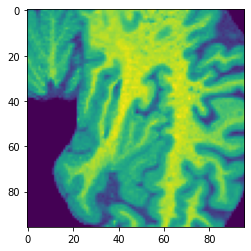

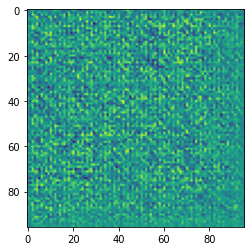

In [23]:
import matplotlib.pyplot as plt
plt.imshow(fake_input[0,0,10].detach().numpy())
plt.show()


plt.imshow(decoder_result[0,0,10].detach().numpy())
plt.show()

##위의 코드는 밑의 commented out 파트 보고 맞게 바꾸기

#sample_batch = next(iter(train_loader)) 
#print("sample batch : ", [i.shape for i in sample_batch])
#
#image_permute = sample_batch[0][0].permute((1,2,0))
#plt.imshow(image_permute)
#plt.title("input image")
#
#plt.show()
#
#output = VAE_model(sample_batch[0])
#output_detached = output[0].detach()[0]
#plt.imshow(output_detached.permute((1,2,0)).numpy())
#plt.title("reconstructed image")
#plt.show()

In [24]:
np.cbrt(13824/64) #이것을 써야함!

6.000000000000001

In [25]:
### 밑 : 원래 2DVAE 코드용 것들 (dataloader완성되면 밑에 부분들 수정해서 제대로 돌리기)

# 4. Training
이제, model, dataloader, ... 도 만들었겠다, training loop정의해서 training시키자!

## Torch lightning을 쓰는데, 일단은 그냥 "아 어떻게 든지 되겠군" 만 하고 밑에 보자 (구체적 작동원리는 현재 상태에서는 과분할듯)
experiment.py 에서 `VAEXperiment`라는 모듈을 `pl.lightning`에서 상속받게 해서 lightning으로 train/val/test/sample_image등등을 하는데, 일단은 그냥 "black box"라고 생각하고 밑에를 보자 (구체적인 것을 하려면 일단 지금단계에서 하기는 너무 이르고, dataloader우리가 대충 만든 후에, 나중에 cVAE할때쯤 그때 (즉, train/test functino을 직접 손봐야하기 시작할떄) 그때 하는 것이 좋을 듯

초간단 이해 for lightning

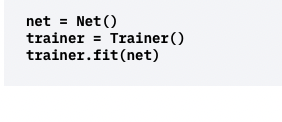

https://pytorch-lightning.readthedocs.io/en/stable/common/lightning_module.html
https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html
위에 보면 대충 나오기는 한다 (앞에 부분 10분정도마 보면 됨)

https://baeseongsu.github.io/posts/pytorch-lightning-introduction/
위의 사이트도 간단하게 잘 정리함

### ASK : 
1. Pin Memory?

In [ ]:
from dataset import VAE_UKB_T1_dataset
from experiment import VAEXperiment #pytorch lightning module을 상속하는 애가 있는데 그것을 가져온다
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint
from pytorch_lightning.plugins import DDPPlugin
from pathlib import Path

###한꺼번에 다하기
#원래는 여기서 training만 해도 되지만, pl lightning써서 많이 간단해짐.. 그래서 여기서 dataloading부터 다 다시 해볼것임

print(config) #config we will use 

#dataloader/dataset정의
data = VAE_UKB_T1_dataset(**config['data_params'], pin_memory=len(config['trainer_params']['gpus']) !=0) #True in this case
data.setup() #setup()해주면 dataloader 등등이 생성이 됨 (source code보면 나옴)

#model생성
model = VanillaVAE(**config['model_params'])
        #직접 불러올때는 : model = vae_models[config['model_params']['name']](**config['model_params'])

#logger 생성 (tensorboard)
tb_logger = TensorBoardLogger(save_dir=config['logging_params']['save_dir'],
                             name = config['model_params']['name'])


#lightning wrapper 
    #model정의(이미 모델을 받아서 그대로 정의), training optimizer종류등등을 모두 정의
pl_model = VAEXperiment(VAE_model, config['exp_params']) 
            #pytorch lightning용 model (to be put into Trainer)에서는 train등등에 대한 정보가 필요해서 이것을 만듬
            #기존 VAE_model을 받아서 pytorch lightning에 쓰는 model 용으로 바꿔줌 (https://pytorch-lightning.readthedocs.io/en/stable/common/lightning_module.html)
        
#pl.Trainer 정의
runner = Trainer(logger = tb_logger,
                 callbacks=[
                     LearningRateMonitor(),
                     ModelCheckpoint(save_top_k=2, 
                                     dirpath =os.path.join(tb_logger.log_dir , "checkpoints"), 
                                     monitor= "val_loss",
                                     save_last= True),
                 ],
                 strategy=None, #DDPPlugin(find_unused_parameters=False), #이거는 여러 node쓰는 거라는데, interactive하게는 안된다고 해서 생략
                 **config['trainer_params'])

#make paths for saving/logging
Path(f"{tb_logger.log_dir}/Samples").mkdir(exist_ok=True, parents=True)
Path(f"{tb_logger.log_dir}/Reconstructions").mkdir(exist_ok=True, parents=True)


print(f"======= Training {config['model_params']['name']} =======")
#실제로 runner.fit에 pl_model넣어서 training시키기
runner.fit(pl_model, datamodule=data) 


{'model_params': {'name': '3d_VanillaVAE', 'in_channels': 1, 'latent_dim': 128}, 'data_params': {'data_path': '/scratch/connectome/mieuxmin/UKB_sample', 'train_batch_size': 2, 'val_batch_size': 2, 'patch_size': 64, 'num_workers': 4, 'img_shape': [96, 96, 96]}, 'exp_params': {'LR': 0.005, 'weight_decay': 0.0, 'scheduler_gamma': 0.95, 'kld_weight': 0.00025, 'manual_seed': 1265}, 'trainer_params': {'gpus': [1], 'max_epochs': 5}, 'logging_params': {'save_dir': 'logs/', 'name': '3d_vae'}}


/home/connectome/dyhan316/.conda/envs/VAE_3DCNN/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:448: LightningDeprecationWarning: Setting `Trainer(gpus=[1])` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=[1])` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


======= Training 3d_VanillaVAE =======


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name  | Type       | Params
-------------------------------------
0 | model | VanillaVAE | 23.6 M
-------------------------------------
23.6 M    Trainable params
0         Non-trainable params
23.6 M    Total params
94.573    Total estimated model params size (MB)


In [ ]:
print(config['data_params'])
print(config['model_params'])
print(config['exp_params'])
print(config['trainer_params'])
print(config['logging_params'])


len(config['trainer_params']['gpus']) !=0

# 5.  training결과 보기
use `tensorboard logger`

**tensorborad 사용법 : 밑에 간단하게 요약이 되어있다** (from 수영쌤)
https://swimming-whale.notion.site/Tensorboard-ce4da477e5344f818425003284e77b97

<br> 

이것을 우리가 이제 쓰는 방법 : 
1. `events.out.tfevents.1662362904.node3.343023.0` 파일 (tensorboard file)이 있는 directory로 가기 (`http://localhost:10033/tree/PyTorch-VAE/logs/VanillaVAE/version_1`) 
2. 거기서 `tensorboard --logdir . --host=0.0.0.0 --port={port 번호}`를 하기 
3. tunneling하기 (랩서버 접속할때 똑같이, 단 port번호 바꿔서)

결과 : 
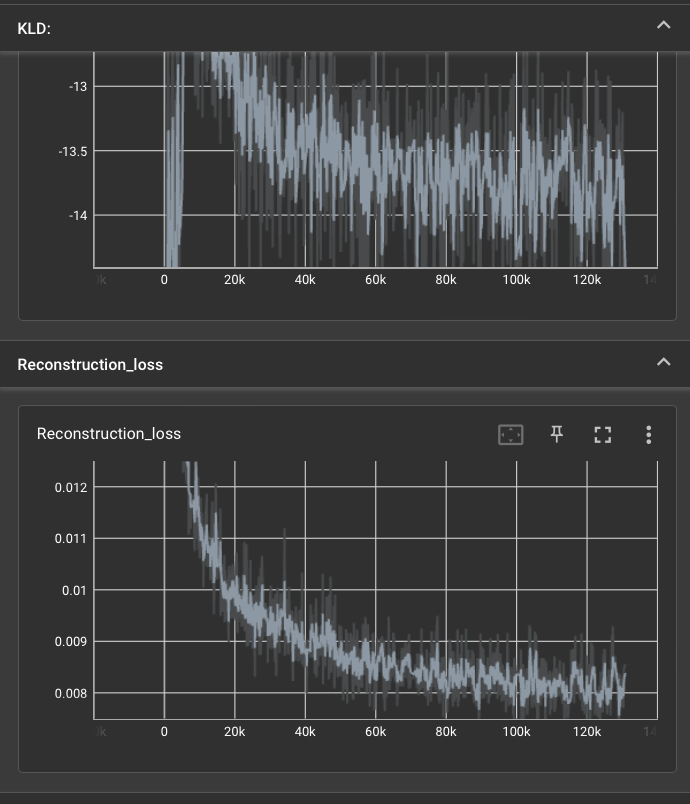


In [ ]:
#앞에서 "tb_lgoger" 만들어서 한것 거기다가 TensorBoardLogger로 다양한 것들이 저장아 됨!! 

# S. Supplmentary
앞의 내용들을 이해하기 위해서 여기다가 풀어놓은 것



## S.1. 생략

## S.2. 생략(일단은 없다)

## S.3. 3번의 파트에서 supplementary stuff
밑에서, decode, encode, 등등파트가 있는데 이들을 하나하나 model안에서가 아닌 밖에서 꺼내서 보도록 하겠다 (이해를 위해)

In [ ]:
#주의하기 : `self.decode`, `self.decoder`두개가 다름!! (너무 이름이 비슷해서 헷갈리기 쉬움)

### S.3.1. encode/decode/reparameterization 해보기

In [ ]:
###TRYING encode/decode/reparameterization### 4.3.1. encode/decode/reparameterization 해보기 code (before doing forward)

sample_batch = next(iter(train_loader)) 
print("sample batch : ", [i.shape for i in sample_batch])

#encode 돌려보기
print("\n==============")
encode_result = VAE_model.encode(sample_batch[0]) #[0] because list에서 앞의 것만 data이고 뒤는 label이니 (dataloader나중에 input으로 넣으면 
        #dataloader이 이걸 알아서 해주기는 함)
        #참고로, nn은 batch 단위로 주는 것을 단정하고 있기에, [0][0]이 아닌 [0]이다! 
        #(i.e. not a single image, but a single batch)
print("encoder result : ",[i.shape for i in encode_result]) 

#reparam돌려보기 (encoder결과 넣어서)
print("\n==============")
reparam_result = VAE_model.reparameterize(encode_result[0], encode_result[1]) #[0] : mu, [1] : logvar
print("reparam result : ",reparam_result.shape) #즉, mu,logvar tensor의 list를 받아서 128dim latent vector (batch 64)를 만든다


#decode 돌려보기 (reparam결과 넣어서)
print("\n==============")
decoder_result = VAE_model.decode(reparam_result)
print("deocder result : ",decoder_result.shape)

### S.3.2. Forward 해보기

In [ ]:
###forward돌려보기
#앞에서 encode, reparam, decode 했었는데, 그것을 이제 한꺼번에 묶은 (+ input, mu, log_var도 내놓는) forward를 해보자
forward_result = VAE_model(sample_batch[0])
print("forward의 결과들 : ",[i.shape for i in forward_result])
    #역시, output, input, mu, log_var shape들이 보인다

### S.3.3. Loss 구하기 (reconstruction loss + KL loss)


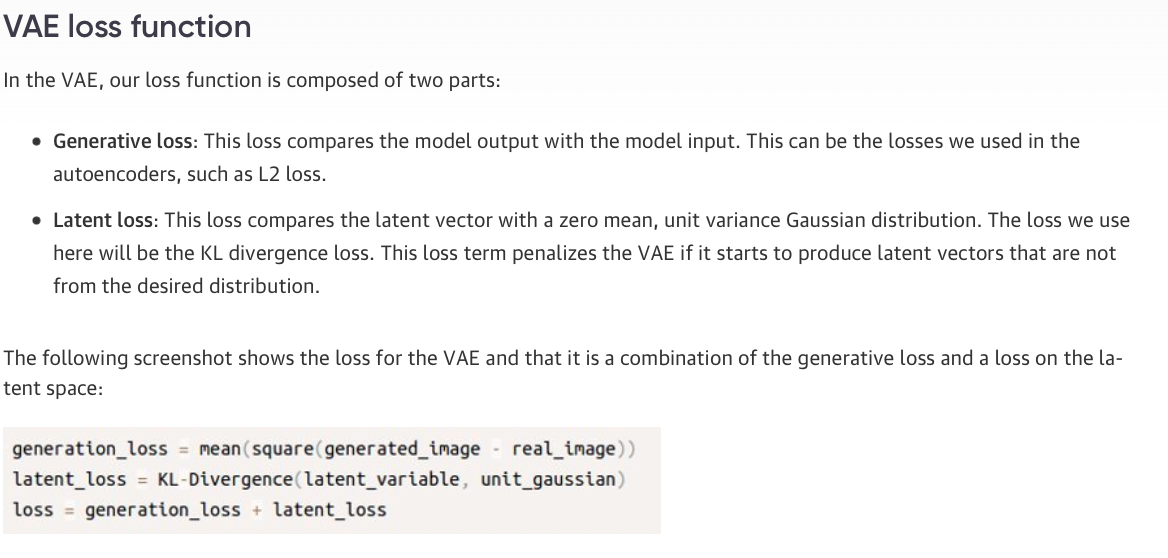

--definition of KL distance--
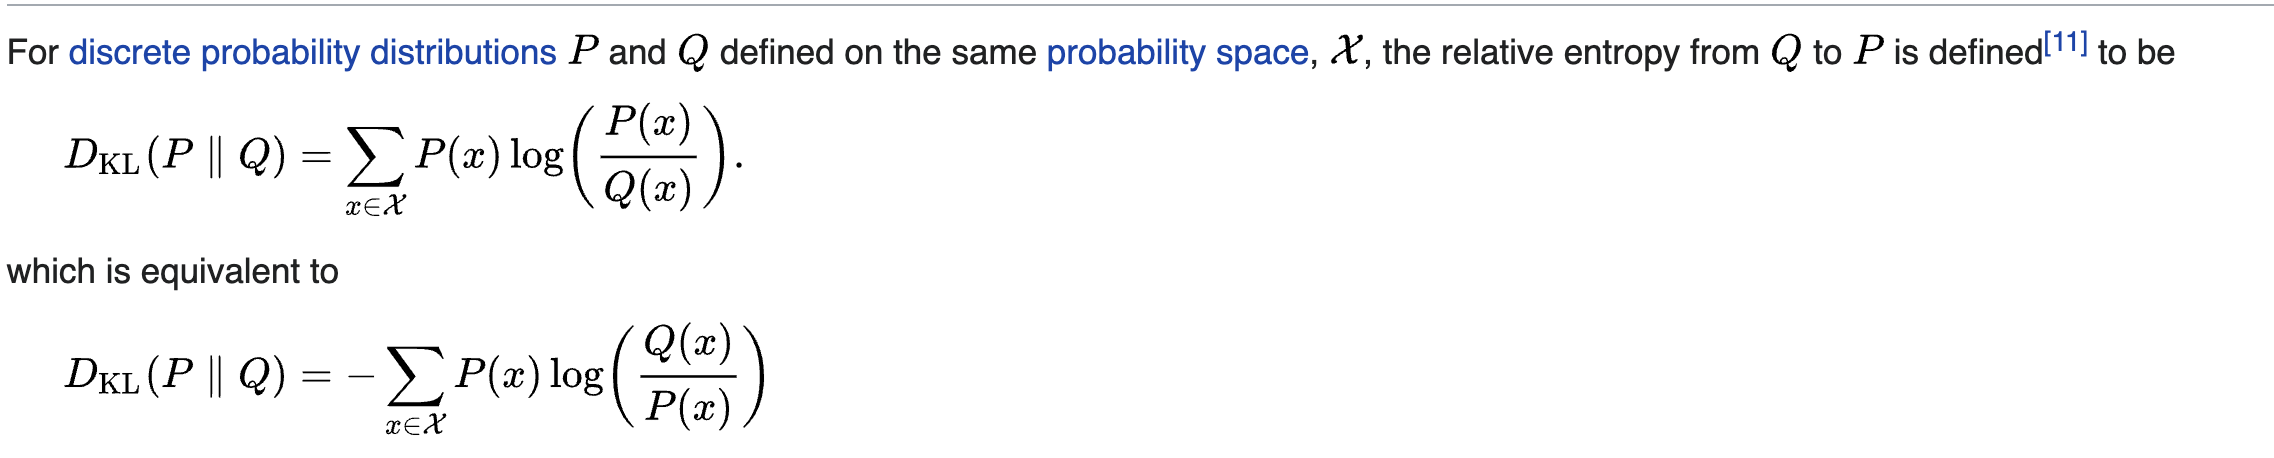

우리 같은 경우, 위에서 P(x)가 N(mu, e^log_var)가 되고 Q(x)가 N(0,1)가 된다 

### KL loss part 유도
일단 밑의 식 : KL of two normal distributions
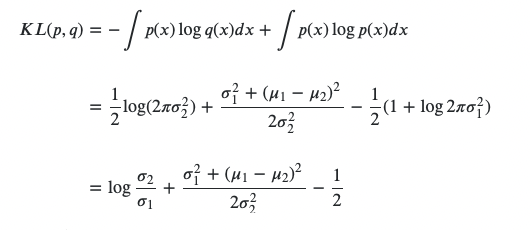

위의 식에서 이제 유도를 하자
$ = -1/2(-2\log(1/\sigma_1)-2\frac{\sigma_1^2 + \mu_1^2}{2}+1)$ ($\because \mu_2 = 0, \sigma_2 = 1$)


$ = -1/2(2\log(\sigma_1) - \sigma_1^2 - \mu_1^2 + 1)$

since $\sigma_1 = \sqrt{\text{var}}$

$ = -1/2(2\log(\sqrt{\text{var}}) - (\sqrt{\text{var}})^2 -\mu_1^2 + 1)$


$ = -\frac{1}{2}(\log{\text{var}}-\text{var} - \mu_1^2 + 1)$

**QED** (위의 식이 실제로 코딩으로 쓰이는 식)


**documentation의 식**

$KL(N(\mu, \sigma), N(0, 1)) = \log \frac{1}{\sigma} + \frac{\sigma^2 + \mu^2}{2} - \frac{1}{2}$

즉, 위의 두 식은 일치! (\sigma와 var이 다르다는 것 주의)

In [ ]:
#######loss돌려보기######
##setup
recon_output = forward_result[0]
input_tensor = forward_result[1]
mu = forward_result[2]
log_var = forward_result[3]
print("output, input의 shapes: ", recon_output.shape, input_tensor.shape)

##MSE loss F.mse_loss로도 보고, 실제로 뭔지도 보기
print(F.mse_loss(recon_output, input_tensor).detach() - torch.sum((recon_output-input_tensor)**2)/(64*3*64*64))
#즉, 둘이 똑같다! (이렇게 하면 mse_loss가 어떤 원리인지 바로 이해가능)

##KL diveregence보기
#위의 설몇에서 나오듯이, we want to compute KL(N(mu, sigma), N(0, 1)) (i.e. 두 distribution간의 거리)
print(mu.shape) #[64,128] 이니, 총 64개의 128dim normal distributino만들어야함 => 그 후 이 64를 average하기

#64개 동시로 P(x)/Q(x)하기 (위의 식을 써서) : 
KL_loss = -1/2 * (log_var - torch.exp(log_var)-mu**2 + 1)
KL_loss = KL_loss.sum()/KL_loss.shape[0] #전체 다 sum한후 갯수 (64)만큼 나누기

KL_loss #실제, 오른쪽 코드와 동일torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim = 1), dim = 0)

밑 : TRASH

In [ ]:
a = nn.Conv2d(1, 3, (3,3))
input_tnsr = torch.randn(2,1,3,3)
print(a(input_tnsr).shape)
print(a(input_tnsr[1:]).shape)


In [ ]:
512*4

In [ ]:
config['model_params']

In [ ]:
config['model_params']

In [ ]:
###밑의 것을 답지삼아 보기!### (its strucutre is the answer and so on)

print(vae_models)
print("==")
print(vae_models['VanillaVAE']) #즉, vanillaVAE작동 시키기 


#이미 작동한느 것 (from the module)을 보자
print(vae_models['VanillaVAE'](**config['model_params'])) #그 vanillaVAE에 model_params를 넣기
vae_models['VanillaVAE']

In [ ]:
(**config['model_params'])

In [ ]:
Wowfantastic1!

## 회사지원!!

## also look at the QnA Excel
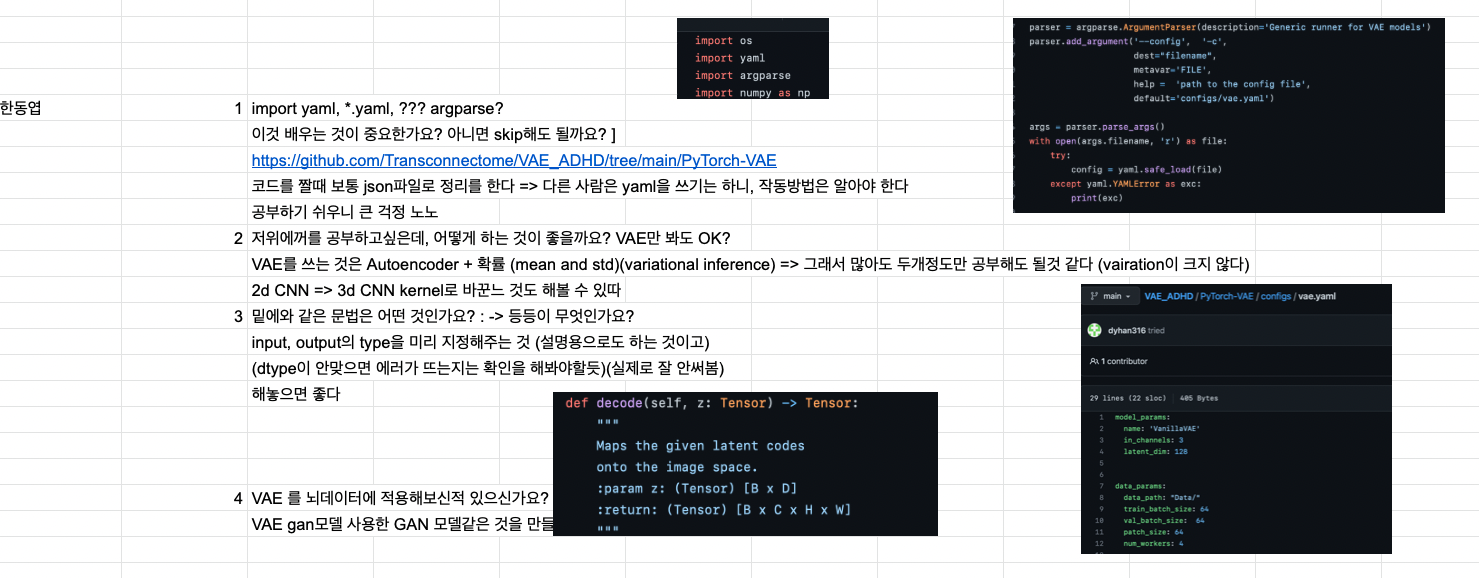

In [ ]:
List